In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
ingre= pd.read_csv('ingredients.csv')

In [3]:
ingre.head()

,id,name,wikipedia_links,hindi_name,wikipedia_image
0,1,Asparagus,https://en.wikipedia.org/wiki/Asparagus,NaN,https://en.wikipedia.org/wiki/Asparagus#/media...
1,2,Lemongrass,https://en.wikipedia.org/wiki/Lemongrass,NaN,https://en.wikipedia.org/wiki/Cymbopogon#/medi...
2,3,Roses,https://en.wikipedia.org/wiki/Roses,Gulab,https://en.wikipedia.org/wiki/Rose#/media/File...
3,5,Lavash,https://en.wikipedia.org/wiki/Lavash,NaN,https://en.wikipedia.org/wiki/Lavash#/media/Fi...
4,6,White Chick Peas,https://en.wikipedia.org/wiki/Chickpea,Kabuli Chana,https://en.wikipedia.org/wiki/Chickpea#/media/...


In [4]:
ingre.rename(columns={'id':'ingredient_id'}, inplace=True)

In [5]:
ingre.head()

,ingredient_id,name,wikipedia_links,hindi_name,wikipedia_image
0,1,Asparagus,https://en.wikipedia.org/wiki/Asparagus,NaN,https://en.wikipedia.org/wiki/Asparagus#/media...
1,2,Lemongrass,https://en.wikipedia.org/wiki/Lemongrass,NaN,https://en.wikipedia.org/wiki/Cymbopogon#/medi...
2,3,Roses,https://en.wikipedia.org/wiki/Roses,Gulab,https://en.wikipedia.org/wiki/Rose#/media/File...
3,5,Lavash,https://en.wikipedia.org/wiki/Lavash,NaN,https://en.wikipedia.org/wiki/Lavash#/media/Fi...
4,6,White Chick Peas,https://en.wikipedia.org/wiki/Chickpea,Kabuli Chana,https://en.wikipedia.org/wiki/Chickpea#/media/...


In [6]:
ingre.shape

(300, 5)

In [7]:
ingre_quantity= pd.read_csv("ingredient_quantities.csv")

In [8]:
ingre_quantity.head()

,Unnamed: 0,recipe_id,ingredient_id,quantity,unit
0,0,1,1,,
1,1,1,2,,
2,2,1,3,,
3,3,1,4,,
4,4,3,4,,


In [9]:
ingre_quantity.shape

(2699, 5)

In [10]:
merge_data= pd.merge(ingre, ingre_quantity, on="ingredient_id")

In [11]:
merge_data.head(10)

,ingredient_id,name,wikipedia_links,hindi_name,wikipedia_image,Unnamed: 0,recipe_id,quantity,unit
0,1,Asparagus,https://en.wikipedia.org/wiki/Asparagus,NaN,https://en.wikipedia.org/wiki/Asparagus#/media...,0,1,,
1,2,Lemongrass,https://en.wikipedia.org/wiki/Lemongrass,NaN,https://en.wikipedia.org/wiki/Cymbopogon#/medi...,1,1,,
2,3,Roses,https://en.wikipedia.org/wiki/Roses,Gulab,https://en.wikipedia.org/wiki/Rose#/media/File...,2,1,,
3,5,Lavash,https://en.wikipedia.org/wiki/Lavash,NaN,https://en.wikipedia.org/wiki/Lavash#/media/Fi...,5,3,,
4,6,White Chick Peas,https://en.wikipedia.org/wiki/Chickpea,Kabuli Chana,https://en.wikipedia.org/wiki/Chickpea#/media/...,6,4,1/2,cup
5,6,White Chick Peas,https://en.wikipedia.org/wiki/Chickpea,Kabuli Chana,https://en.wikipedia.org/wiki/Chickpea#/media/...,19,5,1/2,cup
6,6,White Chick Peas,https://en.wikipedia.org/wiki/Chickpea,Kabuli Chana,https://en.wikipedia.org/wiki/Chickpea#/media/...,81,12,1/2,cup
7,7,Green Mango,https://en.wikipedia.org/wiki/Mangoes,Aam,https://en.wikipedia.org/wiki/Mango#/media/Fil...,7,4,1 1/2,cups
8,7,Green Mango,https://en.wikipedia.org/wiki/Mangoes,Aam,https://en.wikipedia.org/wiki/Mango#/media/Fil...,18,5,1 1/2,cups
9,7,Green Mango,https://en.wikipedia.org/wiki/Mangoes,Aam,https://en.wikipedia.org/wiki/Mango#/media/Fil...,56,9,1/4,cup


In [12]:
sort_by_id = merge_data.sort_values('recipe_id')

In [13]:
sort_by_id.head()

,ingredient_id,name,wikipedia_links,hindi_name,wikipedia_image,Unnamed: 0,recipe_id,quantity,unit
0,1,Asparagus,https://en.wikipedia.org/wiki/Asparagus,NaN,https://en.wikipedia.org/wiki/Asparagus#/media...,0,1,,
1,2,Lemongrass,https://en.wikipedia.org/wiki/Lemongrass,NaN,https://en.wikipedia.org/wiki/Cymbopogon#/medi...,1,1,,
2,3,Roses,https://en.wikipedia.org/wiki/Roses,Gulab,https://en.wikipedia.org/wiki/Rose#/media/File...,2,1,,
3,5,Lavash,https://en.wikipedia.org/wiki/Lavash,NaN,https://en.wikipedia.org/wiki/Lavash#/media/Fi...,5,3,,
90,11,Fennel Seeds,https://en.wikipedia.org/wiki/Fennel,Saunf,https://en.wikipedia.org/wiki/Fennel#/media/Fi...,11,4,1,tbsp


In [14]:
oil_per_recipe= sort_by_id[sort_by_id.name == 'Oil']

In [15]:
final_data= sort_by_id.drop(['ingredient_id', 'wikipedia_links', 'hindi_name','wikipedia_image','Unnamed: 0','quantity','unit'], 
                            axis=1)

In [16]:
final_data.head()

,name,recipe_id
0,Asparagus,1
1,Lemongrass,1
2,Roses,1
3,Lavash,3
90,Fennel Seeds,4


In [17]:
group_ingre = final_data.groupby(['recipe_id', 'name']).count()

In [18]:
print(group_ingre)

Empty DataFrame
Columns: []
Index: [(1, Asparagus), (1, Lemongrass), (1, Roses), (3, Lavash), (4, Asafoetida), (4, Chilli Powder), (4, Dry Kashmiri Red Chillies), (4, Fennel Seeds), (4, Fenugreek Seeds), (4, Green Mango), (4, Mustard Oil), (4, Nigella Seeds), (4, Salt), (4, Turmeric Powder), (4, White Chick Peas), (5, Asafoetida), (5, Chilli Powder), (5, Dry Kashmiri Red Chillies), (5, Fennel Seeds), (5, Fenugreek Seeds), (5, Green Mango), (5, Mustard Oil), (5, Nigella Seeds), (5, Salt), (5, Turmeric Powder), (5, White Chick Peas), (6, Asafoetida), (6, Chilli Powder), (6, Fennel Seeds), (6, Mustard Oil), (6, Nigella Seeds), (6, Salt), (6, Split Mustard Seeds), (6, Turmeric Powder), (7, Crushed Ice), (7, Mint Leaves), (7, Sugar), (8, Asafoetida), (8, Bengal Gram Flour), (8, Carom Seeds), (8, Chilli Powder), (8, Oil), (8, Rice Flour), (8, Salt), (8, Turmeric Powder), (9, Green Mango), (9, Poppy Seeds), (9, Salt), (9, Sambhaar), (9, Sugar), (10, Chilli Powder), (10, Coriander Powder), (10

In [19]:
print(final_data.head())

            name  recipe_id
0      Asparagus          1
1     Lemongrass          1
2          Roses          1
3         Lavash          3
90  Fennel Seeds          4


In [20]:
import matplotlib.pyplot as plt

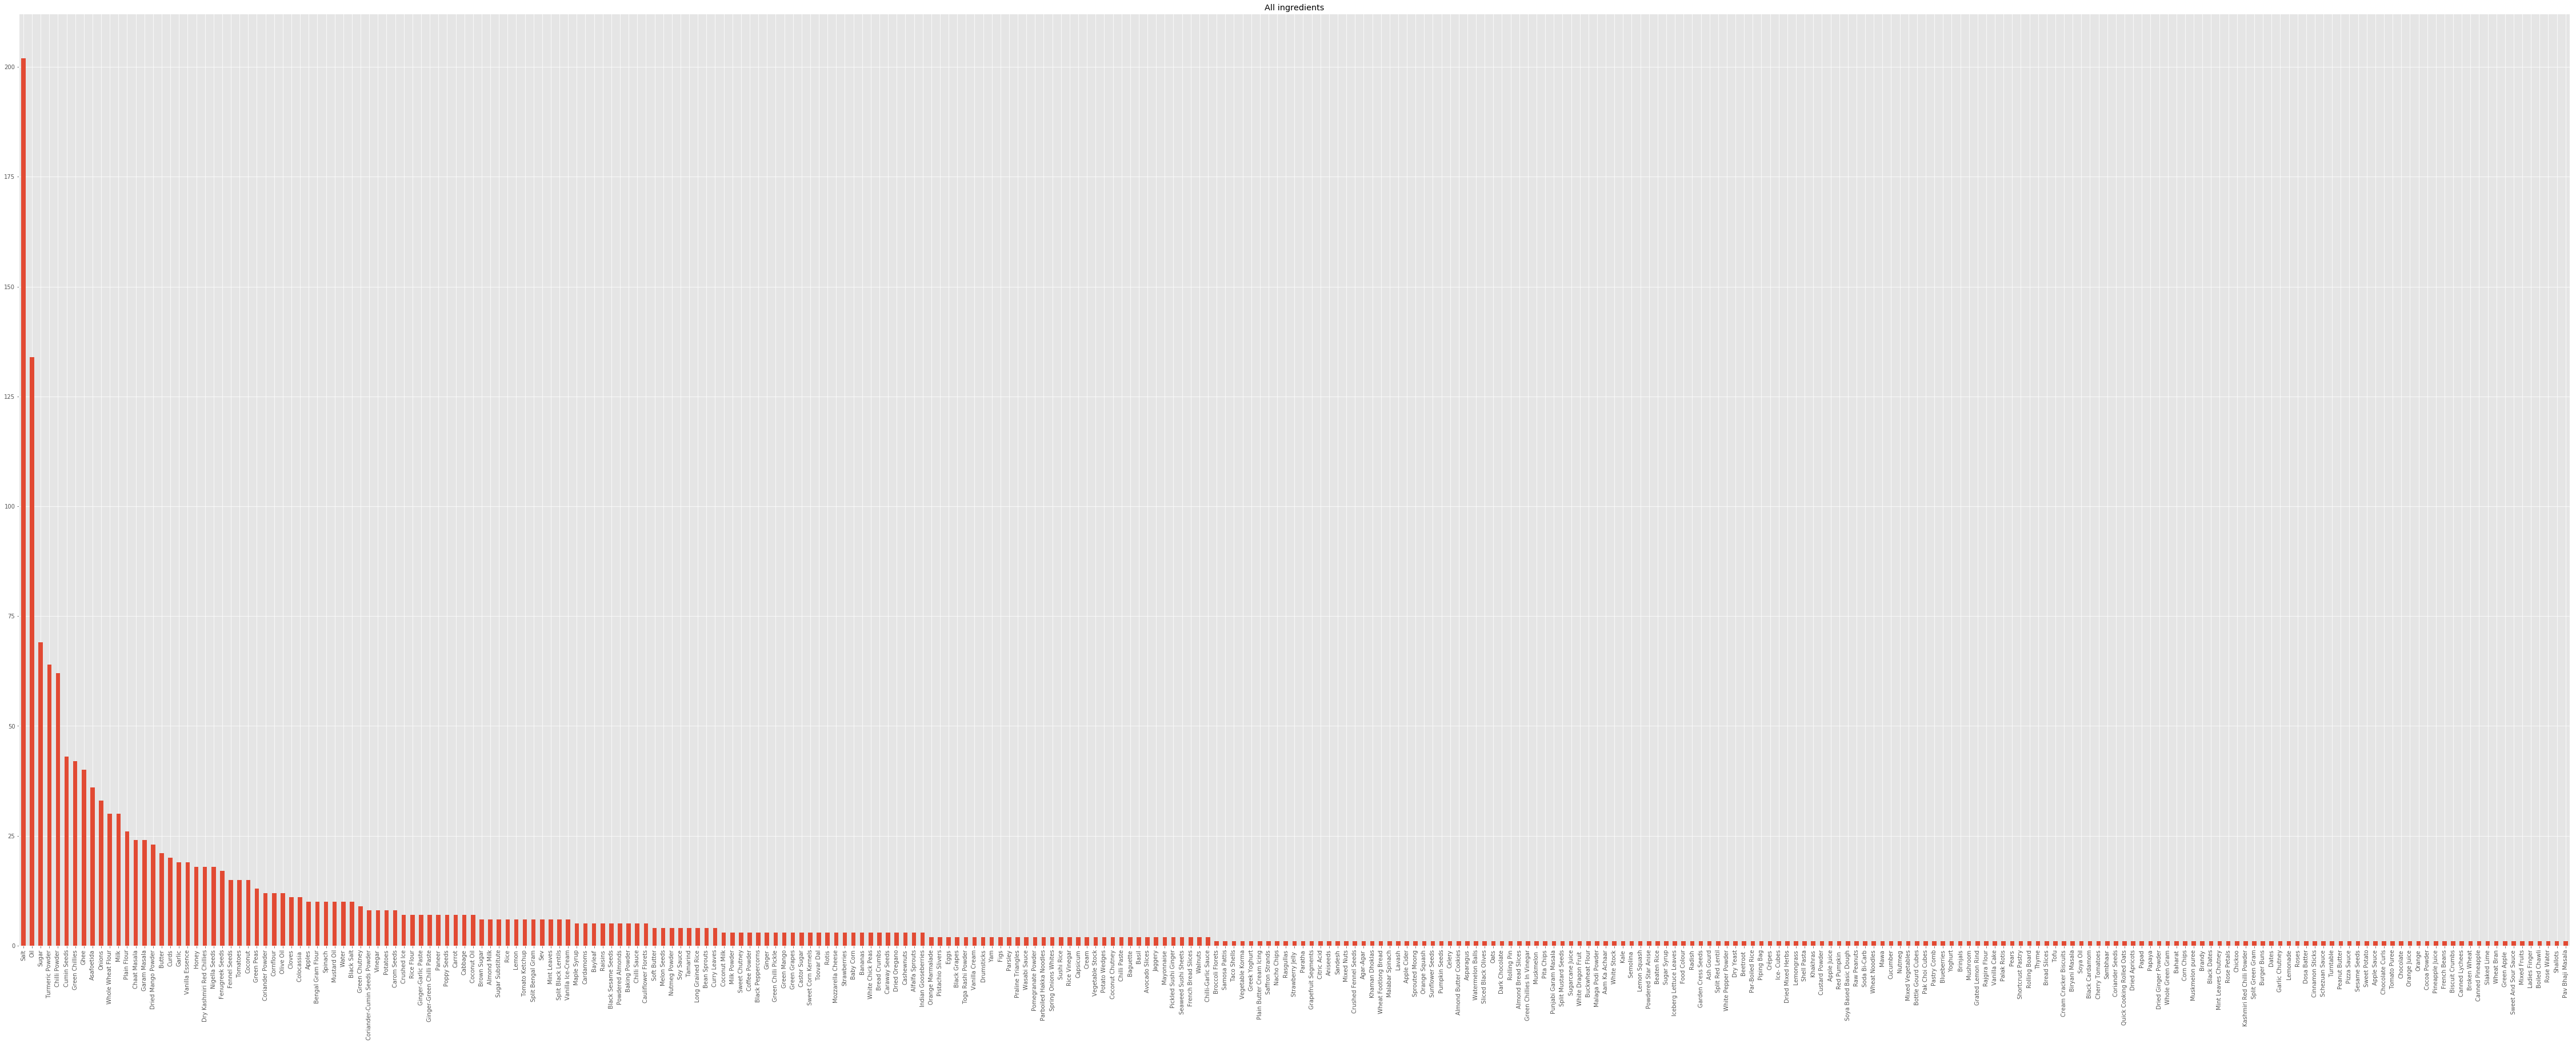

In [21]:
plt.figure(figsize=(80,30))
plt.style.use('ggplot')
final_data['name'].value_counts().plot(kind='bar', title ="All ingredients")

In [22]:
final_data.shape

(1750, 2)

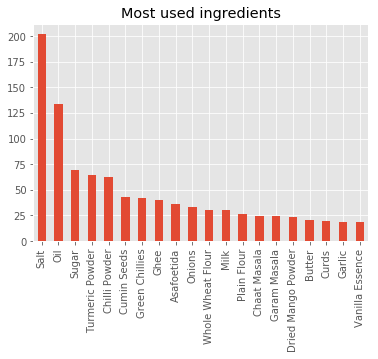

In [23]:
temp= final_data['name'].value_counts()
temp.head(20).plot(kind='bar', title ="Most used ingredients")

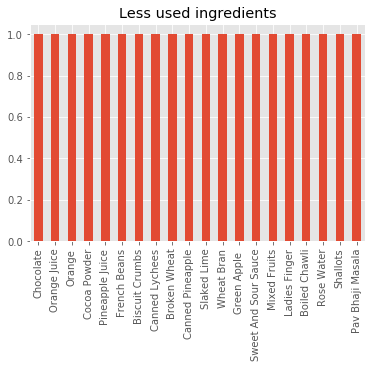

In [24]:
temp= final_data['name'].value_counts()
temp.tail(20).plot(kind='bar', title ="Less used ingredients")

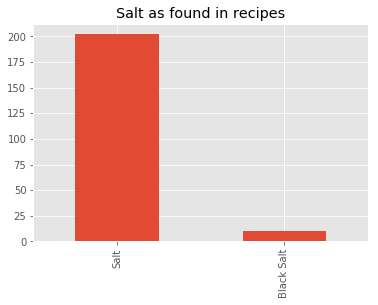

In [25]:
indices = final_data['name'].str.contains('Salt')
final_data[indices]['name'].value_counts().plot(kind='bar',
                                                 title='Salt as found in recipes')

In [26]:
uni_ingre = final_data.groupby(by='recipe_id', as_index=False).agg({'name': pd.Series.nunique})
print(uni_ingre)

     recipe_id  name
0            1     3
1            3     1
2            4    11
3            5    11
4            6     8
5            7     3
6            8     8
7            9     5
8           10     8
9           11     3
10          12    20
11          13    13
12          14    12
13          15    11
14          16    13
15          17     9
16          18    17
17          19    14
18          20    13
19          21    16
20          22    12
21          23    13
22          24    13
23          25     3
24          26     4
25          27    10
26          28     3
27          29     6
28          30     7
29          31     2
..         ...   ...
246        254     6
247        255     3
248        256     3
249        257     4
250        258     6
251        259     7
252        260     7
253        261     2
254        262     2
255        263     4
256        264    10
257        265    10
258        266     3
259        267     2
260        268     1
261        26

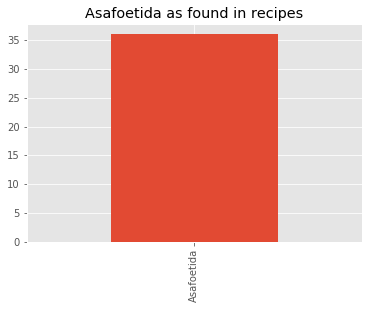

In [27]:
indices = final_data['name'].str.contains('Asafoetida')
final_data[indices]['name'].value_counts().plot(kind='bar',
                                                 title='Asafoetida as found in recipes')

In [28]:
final_data['name'].value_counts()[final_data['name'].value_counts() == final_data['name'].value_counts().max()]

Salt    202
Name: name, dtype: int64

In [29]:
pd.set_option('display.max_rows', 1800)
names=final_data['name']
names

0                          Asparagus
1                         Lemongrass
2                              Roses
3                             Lavash
90                      Fennel Seeds
105                       Asafoetida
141                    Nigella Seeds
159        Dry Kashmiri Red Chillies
177                    Chilli Powder
249                             Salt
239                      Mustard Oil
74                   Fenugreek Seeds
4                   White Chick Peas
10                   Turmeric Powder
7                        Green Mango
91                      Fennel Seeds
5                   White Chick Peas
106                       Asafoetida
142                    Nigella Seeds
11                   Turmeric Powder
8                        Green Mango
178                    Chilli Powder
75                   Fenugreek Seeds
240                      Mustard Oil
250                             Salt
160        Dry Kashmiri Red Chillies
251                             Salt
1

In [30]:
final_data.head(100)   ######### Khelne vala data

,name,recipe_id
0,Asparagus,1
1,Lemongrass,1
2,Roses,1
3,Lavash,3
90,Fennel Seeds,4
105,Asafoetida,4
141,Nigella Seeds,4
159,Dry Kashmiri Red Chillies,4
177,Chilli Powder,4
249,Salt,4


In [85]:
spices = {'spices':['Fennel Seeds','Asafoetida','Dry Kashmiri Red Chillies']}

#print(spices)

spices.keys()
#Traversing dictionary with multi-keys and crearing 
# different lists from it 
spice=[]
spiced= []
for i in spices.values():
    spice.append(i)
print(spice)
len(spice[0])
#for i in range(0,len(spiced[0])):
#    spice.append(spiced[0][i])
#print(spice)

[['Fennel Seeds', 'Asafoetida', 'Dry Kashmiri Red Chillies']]


3

In [77]:
#use only once for creating the category for the single time 
final_data['category']=''


In [100]:
#s.isin(['a'])
print(spice)
final_data['name'].isin(spice[0])
final_data[final_data['name'].isin(spice[0])==True]
indge_index=final_data[final_data['name'].isin(spice[0])==True].index


TypeError: 'Int64Index' object is not callable

In [87]:
#s.isin(['a'])
print(spice)
final_data['name'].isin(spice[0])

[['Fennel Seeds', 'Asafoetida', 'Dry Kashmiri Red Chillies']]


0       False
1       False
2       False
3       False
90       True
105      True
141     False
159      True
177     False
249     False
239     False
74      False
4       False
10      False
7       False
91       True
5       False
106      True
142     False
11      False
8       False
178     False
75      False
240     False
250     False
160      True
251     False
107      True
92       True
241     False
143     False
179     False
451     False
12      False
521     False
522     False
527     False
528     False
452     False
534     False
668     False
252     False
685     False
180     False
13      False
108      True
678     False
9       False
253     False
694     False
453     False
693     False
454     False
254     False
14      False
701     False
93       True
144     False
535     False
181     False
713     False
523     False
455     False
15      False
94       True
255     False
256     False
536     False
242     False
923     False
145     False
109   